In this project, Natural Language Processing (NLP) strategies will be used to analyze Yelp reviews data and predict rating based on the reviews.

Number of 'stars' indicate the business rating given by a customer, ranging from 1 to 5

In [21]:
#import libraries
import numpy as np
import pandas as pd
import sklearn
import spacy
import re
import warnings
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
warnings.filterwarnings("ignore")

!python -m spacy download en

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
     |████████████████████████████████| 12.0 MB 28.1 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [22]:
#Import dataset
yelp_df=pd.read_csv('drive/MyDrive/yelp.csv')

In [23]:
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [24]:
yelp_df.isna().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

In [81]:
yelp_df.stars.describe()

count    10000.000000
mean         3.777500
std          1.214636
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64

In [82]:
yelp_df.stars.value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

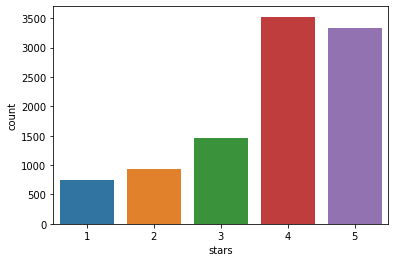

In [115]:
sns.countplot(yelp_df.stars)

In [26]:
 yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [27]:
#first review
yelp_df.text[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [32]:
#cleans data: remove punctuations and stop words

def message_cleaning(message):
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)
    punc_removed_join_clean = [word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return punc_removed_join_clean

In [33]:
#  test the message_cleaning function
yelp_df_clean = yelp_df['text'].apply(message_cleaning)

In [34]:
print(yelp_df_clean[0])

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


In [84]:
# In this 3 line we take dataframe clean it up and create count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = message_cleaning)
yelp_countvectorizer = vectorizer.fit_transform(yelp_df['text'])

In [36]:
yelp_countvectorizer.shape

(10000, 44012)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [61]:
X = yelp_countvectorizer
y=yelp_df['stars'].values

In [62]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:

lr = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
nb = MultinomialNB()

lr.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)
nb.fit(X_train, y_train)

MultinomialNB()

In [64]:
print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train, y_train))
print('\nTest set score:', gbc.score(X_test, y_test))
print("----------------------MultinomialNB Scores----------------------")
print('Training set score:', nb.score(X_train, y_train))
print('\nTest set score:', nb.score(X_test, y_test))

----------------------Logistic Regression Scores----------------------
Training set score: 0.990625

Test set score: 0.4885
----------------------Random Forest Scores----------------------
Training set score: 1.0

Test set score: 0.457
----------------------Gradient Boosting Scores----------------------
Training set score: 0.632875

Test set score: 0.482
----------------------MultinomialNB Scores----------------------
Training set score: 0.788125

Test set score: 0.4735


#TF-IDF

In [67]:
from sklearn.feature_extraction.text import TfidfTransformer

# Applying the vectorizer
X_TFIDF = TfidfTransformer().fit_transform(yelp_countvectorizer)
y=yelp_df['stars'].values

In [68]:


X_train, X_test, y_train, y_test = train_test_split(X_TFIDF, y, test_size=0.2)

lr = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
nb = MultinomialNB()

lr.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)
nb.fit(X_train, y_train)


MultinomialNB()

In [69]:
print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train, y_train))
print('\nTest set score:', gbc.score(X_test, y_test))
print("----------------------MultinomialNB Scores----------------------")
print('Training set score:', nb.score(X_train, y_train))
print('\nTest set score:', nb.score(X_test, y_test))

----------------------Logistic Regression Scores----------------------
Training set score: 0.81725

Test set score: 0.536
----------------------Random Forest Scores----------------------
Training set score: 1.0

Test set score: 0.462
----------------------Gradient Boosting Scores----------------------
Training set score: 0.669

Test set score: 0.4735
----------------------MultinomialNB Scores----------------------
Training set score: 0.5755

Test set score: 0.437


Test some text reviews.

In [107]:
test_sample=['very good food! I love the place.']
test_sample_countvectorizer = vectorizer.transform(test_sample)
test_predict=gbc.predict(test_sample_countvectorizer)
test_predict

array([5])

In [86]:
test_sample=['terrible! smelled bad']
test_sample_countvectorizer = vectorizer.transform(test_sample)
test_predict=gbc.predict(test_sample_countvectorizer)
test_predict

array([2])

In [109]:
test_sample=['very busy place,drinks were good but our food was cold']
test_sample_countvectorizer = vectorizer.transform(test_sample)
test_predict=gbc.predict(test_sample_countvectorizer)
test_predict

array([4])

In this project Number of 'stars' indicate the business rating given by a customer, ranging from 1 to 5. The reason for poor result is that its not easy to predict between close ratings. 
Also the data is not very balanced for example 4 star ratings are almost 5 times more than 1 star ratings.
